<a href="https://colab.research.google.com/github/KS0999/ML/blob/main/Error_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch

weight = 0.7
bias = 0.3

start = 0
step = 0.02
end = 1

X = torch.arange(start,end,step).unsqueeze(dim=1)
y = X*weight + bias

len(X),len(y)

(50, 50)

In [ ]:
data_split=int(len(X)*0.8)
X_train,X_test=X[:data_split],X[data_split:]
y_train,y_test=y[:data_split],y[data_split:]
len(X_train),len(X_test),len(y_train),len(y_test)

(40, 10, 40, 10)

In [ ]:
def LinearRegression(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     prediction=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,s=10,c="b",label="train data")
  plt.scatter(test_data,test_labels,s=10,c="g",label="test data")

  if prediction is not None:
    plt.scatter(prediction,test_labels,s=10,c="r",label="prediction data")
  plt.legend()

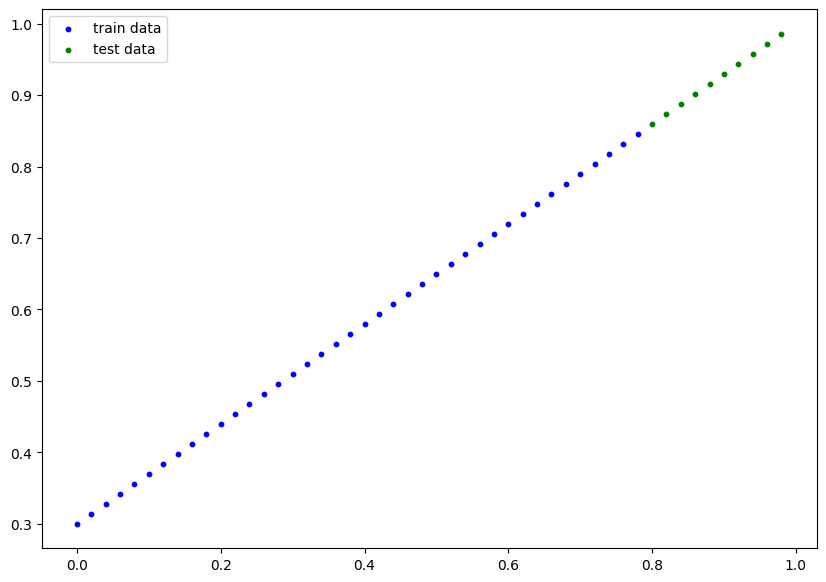

In [ ]:
LinearRegression();

In [ ]:
import torch.nn as nn
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight=nn.Parameter(torch.randn(1,
                                         dtype=torch.float,
                                         requires_grad=True))
    self.bias=nn.Parameter(torch.randn(1,
                                         dtype=torch.float,
                                         requires_grad=True))
  def forward(self,x=torch.Tensor)->torch.Tensor:
    return x * self.weight + self.bias

# 新增區段

In [ ]:
model_1=LinearRegressionModel()
model_1.state_dict()

OrderedDict([('weight', tensor([-0.3337])), ('bias', tensor([-1.5220]))])

In [ ]:
with torch.inference_mode():
  y_pred=model_1(X_test)
y_pred

tensor([[-0.3458],
        [-0.3439],
        [-0.3420],
        [-0.3401],
        [-0.3381],
        [-0.3362],
        [-0.3343],
        [-0.3324],
        [-0.3305],
        [-0.3286]])

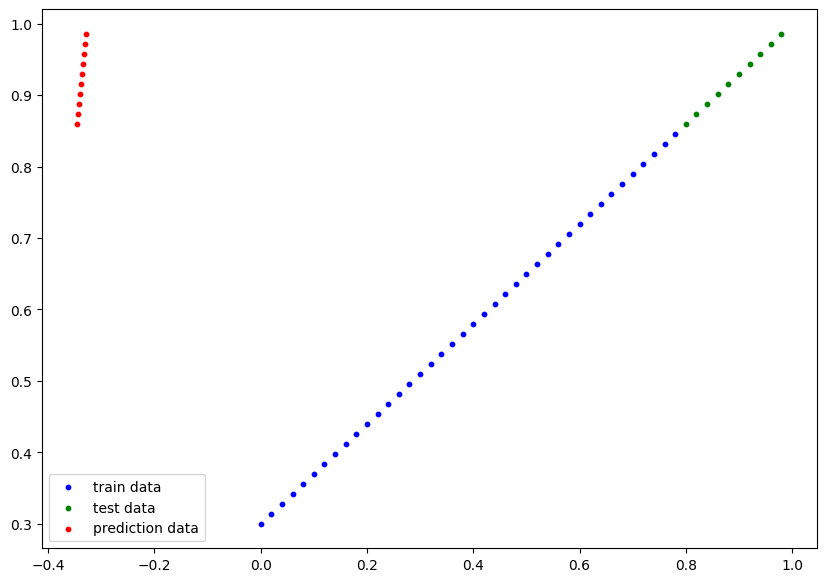

In [ ]:
LinearRegression(prediction=y_pred);

In [ ]:
loss_funciton=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_1.parameters(),
                          lr=0.001)

In [ ]:
torch.manual_seed(42)

epoch_count=[]
loss_values=[]
test_loss_values=[]

epochs=100
for epoch in range(epochs):
  model_1.train()
  y_pred=model_1(X_train)
  loss=loss_funciton(y_pred,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_1.eval()
  with torch.inference_mode():
    test_pred=model_1(X_test)
    test_loss=(test_pred,y_test)
  if epoch%20==0 :
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch:{epoch} | Loss:{loss} | Test Loss:{test_loss}")
    print(model_1.state_dict())

Epoch:0 | Loss:0.0005995534593239427 | Test Loss:(tensor([[0.8592],
        [0.8732],
        [0.8872],
        [0.9012],
        [0.9152],
        [0.9291],
        [0.9431],
        [0.9571],
        [0.9711],
        [0.9851]]), tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]]))
OrderedDict([('weight', tensor([0.6994])), ('bias', tensor([0.2997]))])
Epoch:20 | Loss:0.0005995534593239427 | Test Loss:(tensor([[0.8592],
        [0.8732],
        [0.8872],
        [0.9012],
        [0.9152],
        [0.9291],
        [0.9431],
        [0.9571],
        [0.9711],
        [0.9851]]), tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]]))
OrderedDict([('weight', tensor([0.6994])), ('bias', tensor([0.2997]))])
Epoch:40 | Loss:0.000599553

In [ ]:
# plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()),label="Train Loss")
# plt.plot(epoch_count,test_loss,label="Test Loss")
# plt.xlabel("epoch_count")
# plt.ylabel("loss")

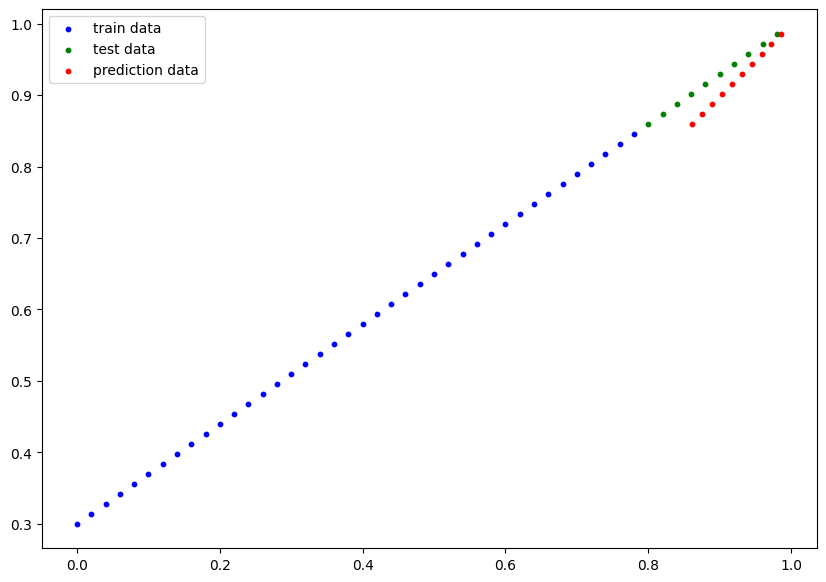

In [ ]:
with torch.inference_mode():
  y_pred1=model_1(X_test)
LinearRegression(prediction=y_pred1);

Saving a module in Pytorch

1.torch.save()

2.torch.load()

3.torch.nn.module.load_state_dict()



In [ ]:
from pathlib import Path
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

MODEL_NAME="Error test"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)